In-class exercise 1.5
UW AMATH 301 - Jakob Kotas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [11]:
#1
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return np.sin(np.pi*x)

x1 = np.arange(-2,2.1) #(a) Seeing only round-off error
x2 = np.arange(-2,2.1,0.5) #(b) Still not enough points
x3 = np.arange(-2,2.1,0.01) #(c) Looks good


y1 = f(x1)
y2 = f(x2)
y3 = f(x3)



#plt.plot(x1,y1)
#plt.plot(x2,y2)
#plt.plot(x3,y3)

#(d) Plots showing dots
#plt.plot(x1,y1,'r.')
#plt.plot(x2,y2,'r.')
#plt.plot(x3,y3,'r.')


: 

(-1.1, 1.1, -1.1, 1.1)

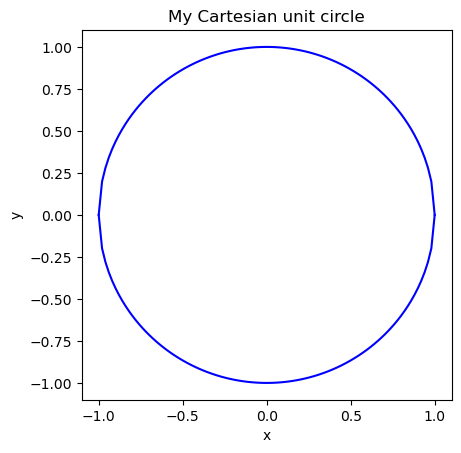

In [3]:
#2
import numpy as np
import matplotlib.pyplot as plt

#First approach: solve x^2+y^2=1 for y
#y=sqrt(1-x^2) (upper half of circle), -sqrt(1-x^2) (lower half)
x = np.linspace(-1,1,101) #linspace is >>>inclusive<<< of the second number!
plt.plot(x,np.sqrt(1-x**2),'-b',x,-np.sqrt(1-x**2),'-b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('My Cartesian unit circle')
plt.axis('scaled') #scales x- and y-axes together

(-1.1, 1.1, -1.1, 1.1)

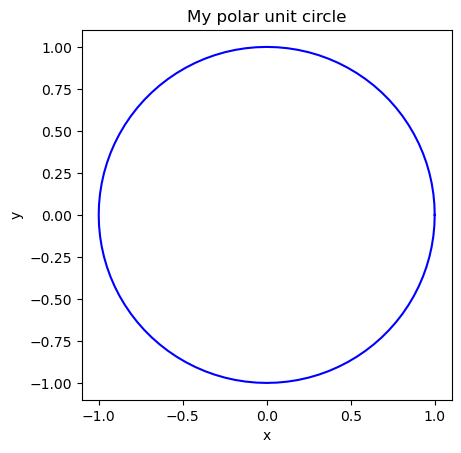

In [2]:
#2
import numpy as np
import matplotlib.pyplot as plt

#Second approach: polar coordinates
#x=cos(theta), y=sin(theta)
theta = np.linspace(0,2*np.pi,101)
plt.plot(np.cos(theta),np.sin(theta),'-b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('My polar unit circle')
plt.axis('scaled')

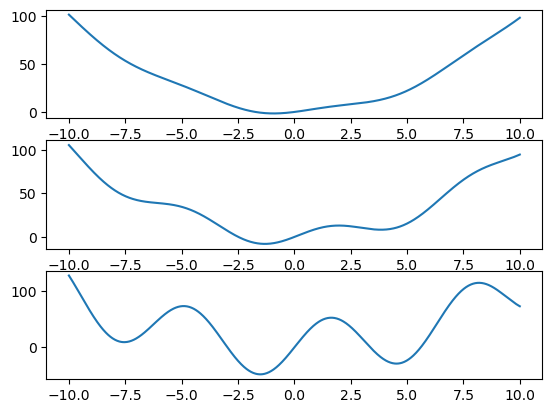

In [63]:
#3

def f(x,a):
  return x**2+a*np.sin(x)

x = np.linspace(-10,10,1001)

#fig, axes = plt.subplots(3,1, constrained_layout=True) #spaces out the subplots better

fig = plt.subplot(311)
plt.plot(x,f(x,3)) #(a)
#plt.axis([-10, 10, -50, 150]) #(b) axis bounds: low x, high x, low y, high y
#plt.yticks(np.arange(-50,151,50)) #(c) set tick marks at y=-50, 0, 50, 100
#plt.xticks(np.arange(-10,11,2)) #(c) set tick marks at x=-10, -8, ..., 10
#plt.grid() #(d)
#plt.title('a=3') #(e)

fig = plt.subplot(312)
plt.plot(x,f(x,10)) #(a)
#plt.axis([-10, 10, -50, 150]) #(b)
#plt.yticks(np.arange(-50,151,50)) #(c)
#plt.xticks(np.arange(-10,11,2)) #(c)
#plt.grid() #(d)
#plt.title('a=10') #(e)

fig = plt.subplot(313)
plt.plot(x,f(x,50)) #(a)
#plt.axis([-10, 10, -50, 150]) #(b)
#plt.yticks(np.arange(-50,151,50)) #(c)
#plt.xticks(np.arange(-10,11,2)) #(c)
#plt.grid() #(d)
#plt.title('a=50') #(e)

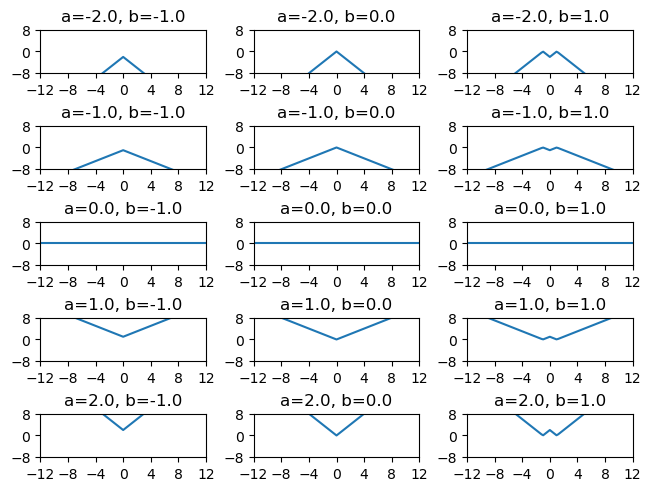

In [27]:
#4

def f(x,a,b):
  return a*abs(abs(x)-b)

x = np.linspace(-12,12,101)

avec = np.arange(-2,2.1,1) #a values: -2, -1, 0, 1, 2
bvec = np.arange(-1,1.1,1) #b values: -1, 0, 1

fig, axes = plt.subplots(len(avec),len(bvec), constrained_layout=True) #spaces out the subplots better

index=1 #see plt.subplot documentation
for a in avec:
    for b in bvec:
        fig = plt.subplot(len(avec),len(bvec),index) #(a)
        plt.plot(x,f(x,a,b)) #(a)
        plt.axis([-12,12,-8,8]) #(b)
        plt.xticks(np.arange(-12,12.1,4)) #(c)
        plt.yticks(np.arange(-8,8.1,8)) #(c)
        plt.title('a=' + str(a) + ', b=' + str(b)) #(c)

        index = index+1 #(a)

plt.savefig('15plots.pdf',format='pdf') #(d)

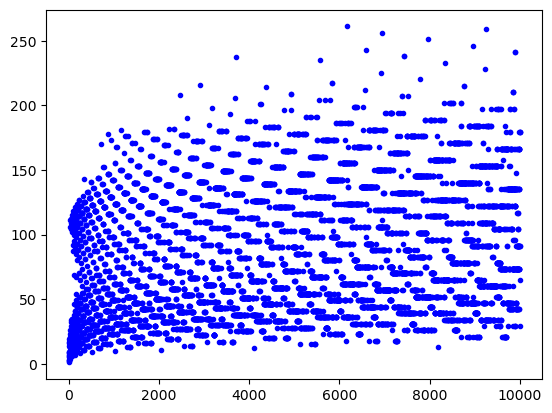

In [9]:
#5a,c

#code below from flex day 1: finds number of Collatz iterations to hit 1 for
#   starting values from 1 to 10,000---
numiters = np.array([]) #number of iterations
startvals = np.arange(1,10001) #starting values

for astart in startvals:
  avec = np.array([astart])

  for n in range(1,1001):
    an = avec[-1] #a_n = last entry in avec
    if np.mod(an,2)==0: #a_n is even
      anpo = an/2 #a_(n+1)=a_n/2
    else: #a_n is odd
      anpo = 3*an+1 #a_(n+1)=3a_n+1

    avec = np.append(avec,anpo)

    if anpo==1:
      break

  numiters = np.append(numiters,n)
    
plt.plot(startvals,numiters,'.b')
#code above from flex day 1---

np.save('collatz_startvals.npy',startvals) #save the startvals array
np.save('collatz_numiters.npy',numiters) #save the numiters array

data_dict = {'collatz_startvals': startvals, 'collatz_numiters': numiters}
with open('collatz_data.pkl', 'wb') as f:
    pickle.dump(data_dict, f)

In [13]:
#5b (np.load)

#restart kernel
print(startvals) #check: this variable really has been deleted!

#startvals = np.load('collatz_startvals.npy') #load it back
#numiters = np.load('collatz_numiters.npy')
#plt.plot(startvals,numiters,'og',markersize=5,markerfacecolor='none')
#plt.xlabel('Starting value')
#plt.ylabel('Number of iterations')
#plt.title('Number of Collatz iterations to reach 1')

[    1     2     3 ...  9998  9999 10000]


In [15]:
#5d (pickle file)

#restart kernel

#with open('collatz_data.pkl', 'rb') as f:
#    loaded_data_dict = pickle.load(f)
#startvals = loaded_data_dict['collatz_startvals']
#numiters = loaded_data_dict['collatz_numiters']

print(startvals)
print(numiters)

[    1     2     3 ...  9998  9999 10000]
[ 3.  1.  7. ... 91. 91. 29.]
